In [1]:
# # YoutubeModule Class
# from CrawlingModule import YoutubeBulider
# # KEY 파일로 읽어오기
# KEY_FILE = open('./API_KEY.txt', 'r')
# # API_KEY 할당
# API_KEY = KEY_FILE.readline().split('-')[1]

# # YoutbeModule Instarnce 
# bulider = YoutubeBulider(API_KEY)

# channelId = bulider.search_channelId('침착맨')

# video_id_list = bulider.get_videoId_in_channel(channelId=channelId)

In [2]:
# videos_list = bulider.get_categoryId_in_channel(videoId_list=video_id_list)

In [4]:
# comments_list = bulider.get_comments(video_id_list)

In [5]:
# import pandas as pd

# # video_id,category_id,category_name,title,views_count,like_count,created_at
# chim_df = pd.DataFrame(videos_list, columns=['video_id', 'category_id', 'category_name', 'title', 'views_count', 'like_count', 'uploaded_at'])

# chim_df.created_at = pd.to_datetime(chim_df.uploaded_at)
# # df.to_csv('./데이터/침착맨_videos.csv', index=False)


In [29]:
import re
def test(text:str) -> str:
    """
    description column에서 공백을 추가해서 해시태그만 반환한다.
    
    정규표현식 메타 문자 설명:

    #   : 첫 문자는 #으로 시작
    \w  : 문자를 뜻함.
    +   : 앞의 메타문자를 반복 (여기서는 \w)
    
    사용예제: 

    > test(df.description[0])
    > df.description.apply(test)
    """
    result = ' '.join(re.findall('#\w+', text))
    return result

In [32]:
import pandas as pd
chim_df = pd.read_csv('./데이터/침착맨_videos.csv', encoding='utf-8', engine='python')
chim_df.uploaded_at = pd.to_datetime(chim_df.uploaded_at)


chim_df.sort_values(by='views_count', ascending=False).head(10)
chim_df.sort_values(by='like_count', ascending=False).head(10)

chim_df.description = chim_df.description.apply(test)
chim_df.description.str.contains('#침착맨')

0                          #침착맨 #뉴스
2     #침착맨 #레데리2 #reddeadredemption
3                    #침착맨 #카더가든 #비비
4                    #침착맨 #카더가든 #비비
5                     #침착맨 #맛가루 #먹방
                  ...              
95              #침착맨 #미연시 #나만의작은아이돌
96                  #침착맨 #주호민 #통닭천사
97           #침착맨 #박지성 #배성재 #카타르월드컵
98                   #침착맨 #박지성 #배성재
99                  #침착맨 #GTA5 #금쪽이
Name: description, Length: 99, dtype: object

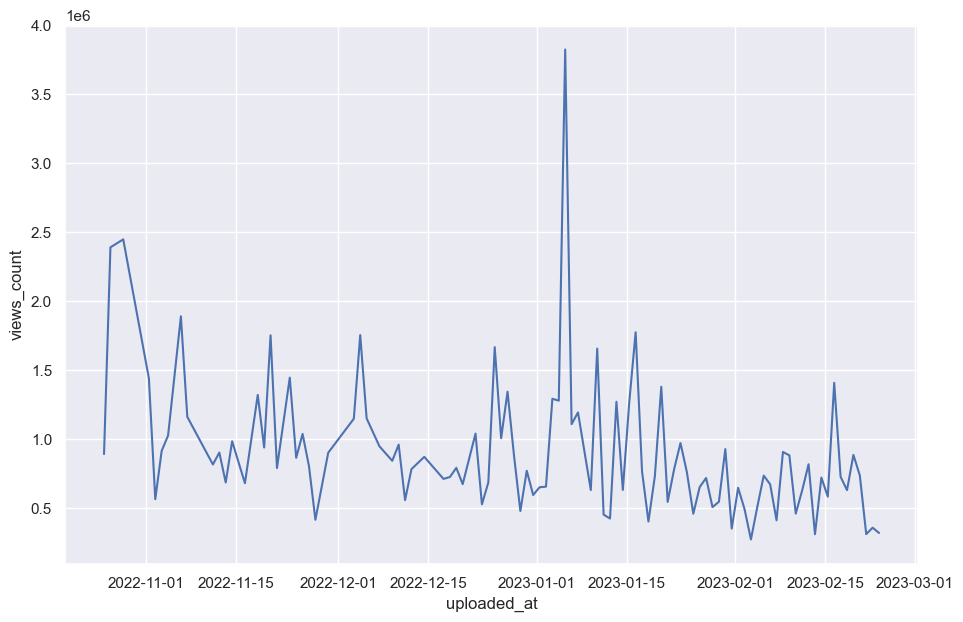

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

plt.rcParams['figure.figsize'] = (11, 7)

sns.lineplot(x=chim_df.uploaded_at, y=chim_df.views_count)
plt.show()

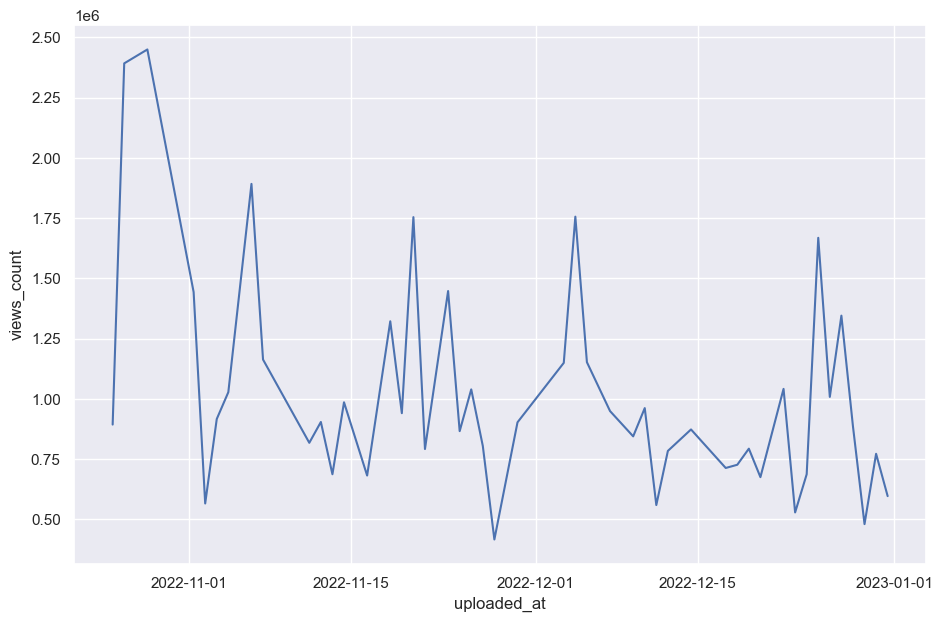

In [14]:
sns.lineplot(x=chim_df.uploaded_at, y=chim_df.sort_values(by='views_count', ascending=False).loc[chim_df.uploaded_at.dt.year == 2022].views_count)
plt.show()

In [19]:
chim_df.sort_values(by='views_count', ascending=False).loc[chim_df.uploaded_at.dt.year == 2022]

NameError: name 'chim_df' is not defined

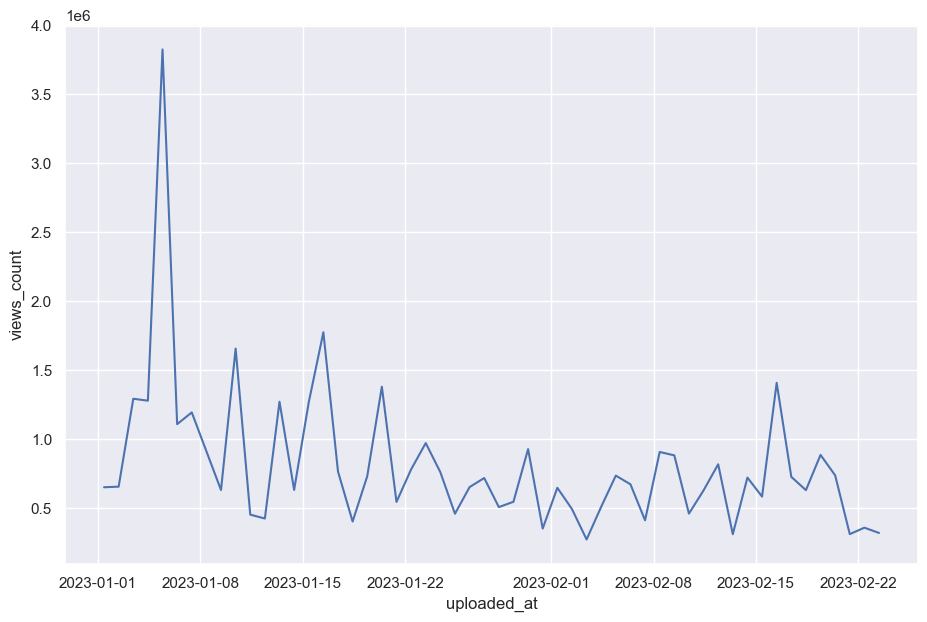

In [29]:
sns.lineplot(x=chim_df.uploaded_at, y=chim_df.sort_values(by='views_count', ascending=False).loc[chim_df.uploaded_at.dt.year == 2023].views_count)
plt.show()

In [36]:
chim_df.sort_values(by='views_count', ascending=False).loc[chim_df.uploaded_at.dt.year == 2023]

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,description
48,SP-LJqVgQuw,24,Entertainment,[ENG] 뉴진스 초대석,3826448,58458,2023-01-05 10:00:10+00:00,#침착맨 #뉴진스 #주우재
38,5l5OUajgNOA,24,Entertainment,안녕 구찌,1776296,19113,2023-01-16 10:00:02+00:00,#침착맨 #피식대학 #박정민 #구찌의자
44,cspfdOFcOsE,24,Entertainment,한국 좀비사태 발생시 필요한 현실능력 월드컵,1657901,11849,2023-01-10 10:00:29+00:00,#침착맨 #주우재 #좀비 #월드컵
7,FwAf4mbaVis,24,Entertainment,사이좋게 나눠먹는 분식,1409741,16925,2023-02-16 10:00:18+00:00,#침착맨 #주호민 #먹방 #분식
34,K3uVJDoFuhw,24,Entertainment,양정무 교수님의 '세상에서 가장 비싼 그림 이야기' 특강,1381402,12597,2023-01-20 10:00:18+00:00,#침착맨 #양정무 #주호민 #미술사
50,RRnO-9xfJY8,24,Entertainment,많이 먹는 사람과 많이 먹기,1294209,13895,2023-01-03 10:00:21+00:00,#침착맨 #주우재 #먹방
49,K6Pfi0yLav8,24,Entertainment,통닭천사 리즈 시절...｜방랑화가 이병건｜EP.05 서울 강남구,1280195,21572,2023-01-04 10:00:08+00:00,#침착맨 #통닭천사 #방랑화가이병건 #리즈
41,8PPUFdfzca0,24,Entertainment,"더 퍼스트 슬램덩크 (THE FIRST SLAM DUNK, 2022) 감상회",1272428,13197,2023-01-13 10:00:03+00:00,#침착맨 #슬램덩크
39,2dmZLhS-inY,24,Entertainment,피식대학 초대석 (with 배우 박정민),1268512,14083,2023-01-15 10:00:26+00:00,#침착맨 #피식대학 #박정민
46,z_OdvenYnAs,24,Entertainment,빵으로 벌어지는 연고전,1195120,13997,2023-01-07 10:00:34+00:00,#침착맨 #연대빵 #고대빵


NameError: name 'chim_df' is not defined